# Question 1
Task 1 . Data preprocessing and visualization

from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

In [46]:
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from pprint import pprint

In [47]:
warnings.filterwarnings('ignore')

In [101]:
data=pd.read_csv("titanic.csv")    # reading the file
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 #Features:
 Ordinal : Pclass , Age ,
 nominal: Name, Ticket , Fare, Cabin
 Categorical: Survived , Sex ,subsp,parch


Missing values


In [49]:
#print("Percentage of missing values:")
print(((data.isna().sum())/data.shape[0])*100)
label=data.iloc[:,0]
print(label)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64


In [50]:
# as missing value in age section is approximate 20 , we can remove all that rows
#age
print(round(data.groupby(['Sex', 'Pclass'])['Age'].agg(['mean']), 0))#age

               mean
Sex    Pclass      
female 1       35.0
       2       29.0
       3       22.0
male   1       41.0
       2       31.0
       3       27.0


In [51]:
#to access missing values
data["Age"] = data["Age"].fillna(-1)

#loop to handle missing values
for data_index in range(data.shape[0]):
  if data["Age"][data_index] == -1:
    if ((data["Sex"][data_index] == "female") and (data["Pclass"][data_index] == 1)):
      data["Age"][data_index] = 35
    elif((data["Sex"][data_index] == "female") and (data["Pclass"][data_index] == 2)):
      data["Age"][data_index] = 29
    elif((data["Sex"][data_index] == "female") and (data["Pclass"][data_index] == 3)):
      data["Age"][data_index] = 22
    elif((data["Sex"][data_index] == "male") and (data["Pclass"][data_index] == 1)):
      data["Age"][data_index] = 41
    elif((data["Sex"][data_index] == "male") and (data["Pclass"][data_index] == 2)):
      data["Age"][data_index] = 31
    elif((data["Sex"][data_index] == "male") and (data["Pclass"][data_index] == 3)):
      data["Age"][data_index] = 27

In [52]:
# as 'Cabin' not decides survival . we can drop it .
data.drop(columns=["Cabin","PassengerId", "Name", "Ticket"], inplace = True)
# passenger id , name and ticket fare does not  affect the survival rate .


In [53]:
data.dropna(inplace=True)    # as Embarked column has very few missing values we can simply drop them.
data.columns
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: xlabel='Survived', ylabel='Fare'>

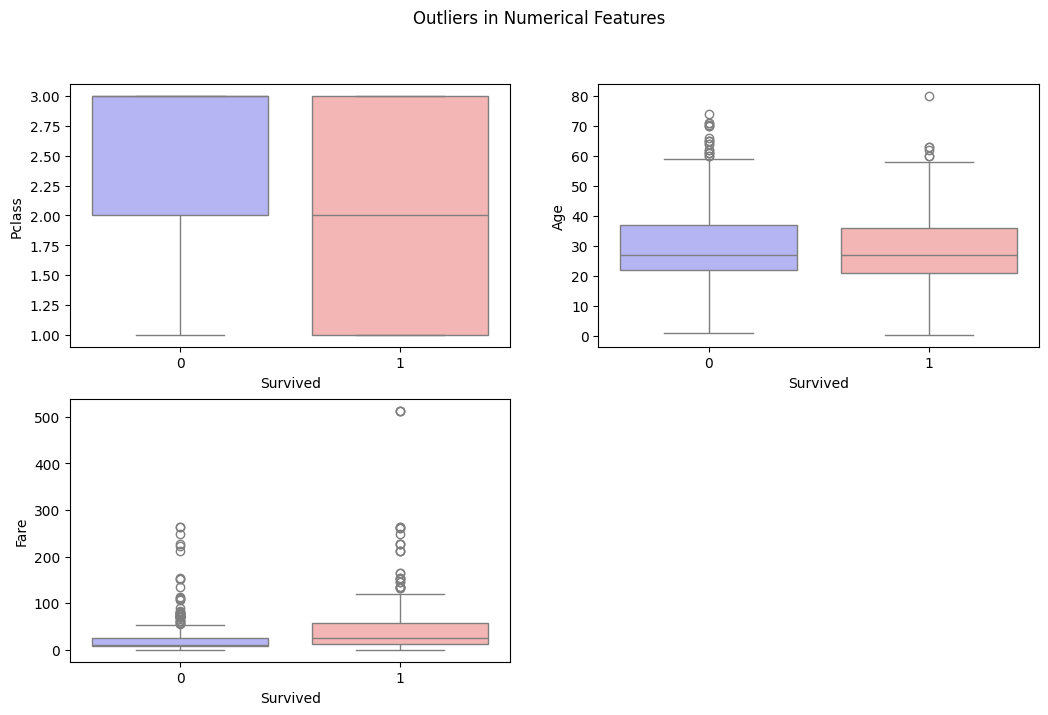

In [54]:
#check for outliers
figure, axes = plt.subplots(2, 2, figsize = (12.5, 7.5))
figure.suptitle("Outliers in Numerical Features")
figure.delaxes(axes[1][1])

sns.boxplot(ax = axes[0, 0], data = data, x = "Survived", y = "Pclass", palette = "bwr")
sns.boxplot(ax = axes[0, 1], data = data, x = "Survived", y = "Age", palette = "bwr")
sns.boxplot(ax = axes[1, 0], data = data, x = "Survived", y = "Fare", palette = "bwr")

#categorical encoding


In [55]:
data["Embarked"].unique()   # as we have change 'C ' to 0, 'S' to 1, 'Q'=2

array(['S', 'C', 'Q'], dtype=object)

In [56]:
#function to encode 'Embarked'
def encode(column):

  for data in column:
    if data == 'S':
      column[column.index(data)] = 0
    elif data == 'C':
      column[column.index(data)] = 1
    else:
      column[column.index(data)] = 2

  return column

In [57]:
# This shows categorical encoding of Embarked column
data["Embarked"]=encode(list(data["Embarked"]))
print(data["Embarked"])

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 889, dtype: int64


<Axes: xlabel='Survived', ylabel='Embarked'>

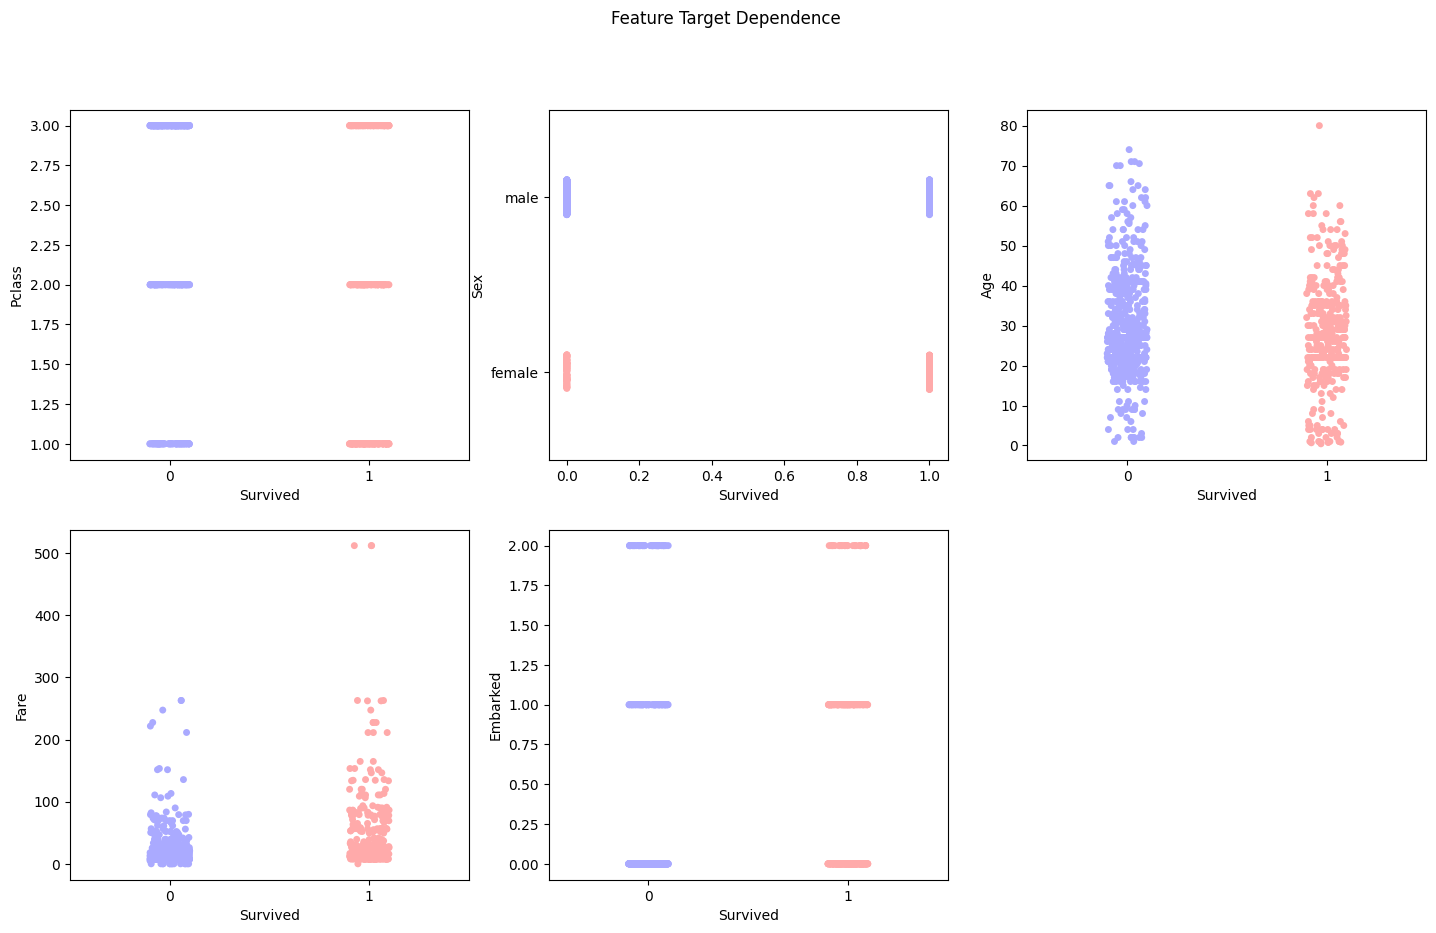

In [58]:

figure, axes = plt.subplots(2, 3, figsize = (17.5, 10))
figure.delaxes(axes[1][2])
figure.suptitle("Feature Target Dependence")

#island
sns.stripplot(ax = axes[0, 0], data = data, x = "Survived", y = "Pclass", palette = "bwr")
sns.stripplot(ax = axes[0, 1], data = data, x = "Survived", y = "Sex", palette = "bwr")
sns.stripplot(ax = axes[0, 2], data = data, x = "Survived", y = "Age", palette = "bwr")
sns.stripplot(ax = axes[1, 0], data = data, x = "Survived", y = "Fare", palette = "bwr")
sns.stripplot(ax = axes[1, 1], data = data, x = "Survived", y = "Embarked", palette = "bwr")

In [59]:
# this is the function to encode sex column
# Female == '1' , male == '0'

def encode_sex(column):
   for data in column:
    if data=="male":
      column[column.index(data)]=0
    else:
      column[column.index(data)]=1
   return column

In [60]:
#  encode sex
print("The Entries of Sex column before encoding",data["Sex"].head(6))

data["Sex"]=encode_sex(list(data["Sex"]))
print("The Entries of Sex column after encoding",data["Sex"].head(6))
data

The Entries of Sex column before encoding 0      male
1    female
2    female
3    female
4      male
5      male
Name: Sex, dtype: object
The Entries of Sex column after encoding 0    0
1    1
2    1
3    1
4    0
5    0
Name: Sex, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,22.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [61]:
X = data.drop(columns='Survived').values
Y = data["Survived"].values.reshape(-1,1)
X

array([[ 3.    ,  0.    , 22.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  1.    , 38.    , ...,  0.    , 71.2833,  1.    ],
       [ 3.    ,  1.    , 26.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,  1.    , 22.    , ...,  2.    , 23.45  ,  0.    ],
       [ 1.    ,  0.    , 26.    , ...,  0.    , 30.    ,  1.    ],
       [ 3.    ,  0.    , 32.    , ...,  0.    ,  7.75  ,  2.    ]])

train_test_validation split in 70:20:10

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Survived'])  # Features
y = data['Survived']  # Labels

# Split the data into training and testing sets
X_train, X_t, y_train, y_t = train_test_split(X, Y, test_size=0.3, random_state=42)


In [63]:
x_val,x_test,y_val,y_test=train_test_split(X_t,y_t,test_size=1/3,random_state=42)

In [64]:
print("The size of training set is: ", X_train.shape)
print("The size of test set is: ", x_test.shape)
print("The size of validation set is: ", x_val.shape)

The size of training set is:  (622, 7)
The size of test set is:  (89, 7)
The size of validation set is:  (178, 7)


#TASK 2 Calculate entropy as a cost function
Task 3, Task 4, Task 05

In [65]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

In [102]:

class decision_tree:
    def __init__(self, min_samples_split=2, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = np.shape(X)

        if num_samples >= self.min_samples_split and curr_depth <= self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)

            if best_split["info_gain"] > 0:
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth + 1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth + 1)
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_info_gain = -float("inf")

        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)

            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)

                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")

                    if curr_info_gain > max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        return best_split

    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index] <= threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index] > threshold])
        return dataset_left, dataset_right

    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)

        if mode == "gini":
            gain = self.gini_index(parent) - (weight_l * self.gini_index(l_child) + weight_r * self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l * self.entropy(l_child) + weight_r * self.entropy(r_child))
        return gain

    def entropy(self, y):
        class_labels = np.unique(y)
        entropy = 0

        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)

        return entropy

    def gini_index(self, y):
        class_labels = np.unique(y)
        gini = 0

        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2

        return 1 - gini

    def calculate_leaf_value(self, Y):
        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(self, tree=None, indent=" "):
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_" + str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        predictions = [self.Infer(x, self.root) for x in X]
        return predictions

    def Infer(self, x, tree):
        if tree.value is not None:
            return tree.value

        feature_val = x[tree.feature_index]

        if feature_val <= tree.threshold:
            return self.Infer(x, tree.left)
        else:
            return self.Infer(x, tree.right)

    def conTocat(data, feature_name):
        if feature_name not in data.columns:
                  threshold = data[feature_name].median()
                  data[f'{feature_name}_binary_category'] = (data[feature_name] <= threshold).astype(int)

        return data



In [100]:
ct= conTocat(data, 'Age', 'Survived')
print(ct)


     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Age_cat
0           0       3    0  22.0      1      0   7.2500         0        0
1           1       1    1  38.0      1      0  71.2833         1        0
2           1       3    1  26.0      0      0   7.9250         0        0
3           1       1    1  35.0      1      0  53.1000         0        0
4           0       3    0  35.0      0      0   8.0500         0        0
..        ...     ...  ...   ...    ...    ...      ...       ...      ...
886         0       2    0  27.0      0      0  13.0000         0        0
887         1       1    1  19.0      0      0  30.0000         0        0
888         0       3    1  22.0      1      2  23.4500         0        0
889         1       1    0  26.0      0      0  30.0000         1        0
890         0       3    0  32.0      0      0   7.7500         2        0

[889 rows x 9 columns]


In [75]:
classifier = decision_tree(min_samples_split=3, max_depth=3)
classifier.fit(X_train,y_train)
classifier.print_tree()

X_1 <= 0.0 ? 0.13713163156486574
 left:X_2 <= 3.0 ? 0.018879102918365198
  left:X_3 <= 2.0 ? 0.40816326530612246
    left:1.0
    right:0.0
  right:X_5 <= 52.0 ? 0.017549560460659863
    left:X_0 <= 1.0 ? 0.006219166643387369
        left:0.0
        right:0.0
    right:X_5 <= 57.0 ? 0.08788204276926093
        left:1.0
        right:0.0
 right:X_0 <= 2.0 ? 0.10113177947108926
  left:X_5 <= 28.7125 ? 0.004914933837429053
    left:X_5 <= 27.75 ? 0.0330612244897959
        left:1.0
        right:0.0
    right:1.0
  right:X_6 <= 0.0 ? 0.07807447153817648
    left:X_5 <= 20.525 ? 0.06989621489621489
        left:0.0
        right:0.0
    right:X_2 <= 24.0 ? 0.06544923301680067
        left:1.0
        right:0.0


In [71]:
y_pred = classifier.predict(x_test.values)
print(y_pred)



[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Task 07


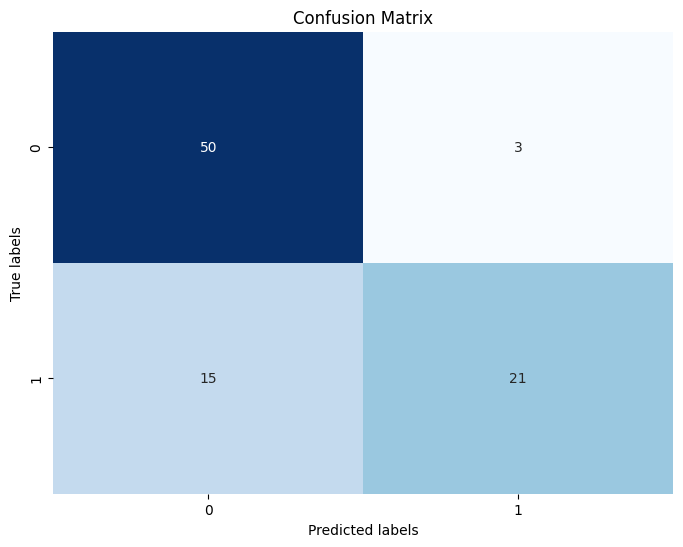

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)      # overall accuracy
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.797752808988764
Precision: 0.875
Recall: 0.5833333333333334
F1 Score: 0.7000000000000001
Confusion Matrix:
[[50  3]
 [15 21]]


#Question 02 Linear Regression


#Question 02

Task 01

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# a
df=pd.read_csv("krishu.csv")
df.head()    # it shows first five rows.

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


Text(0, 0.5, 'Sales')

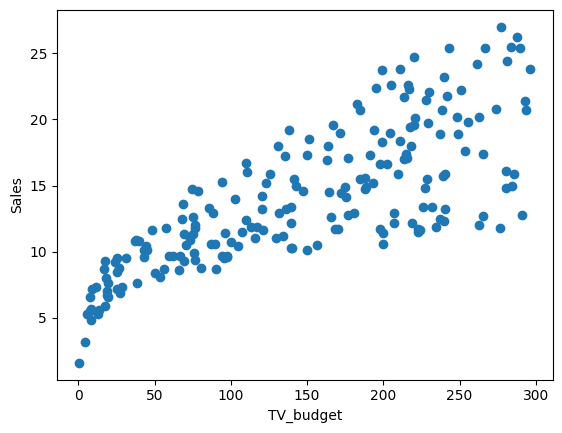

In [ ]:
# part b
# for scatter plot\
xpoints=df["TV"]
ypoints=df['Sales']
plt.scatter(xpoints,ypoints)
plt.xlabel("TV_budget")
plt.ylabel("Sales")
# it shows that for each tv marketing sales are greater than 10

The mean of TV and sales are:  147.0425 14.0225
The Standard Deviation  of TV and sales are:  85.85423631490808 5.217456565710478


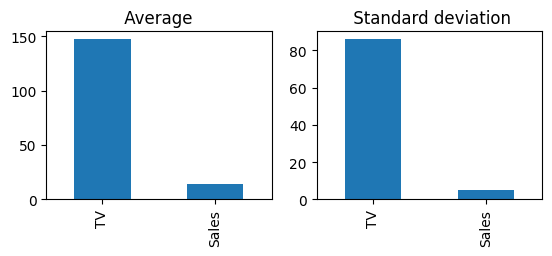

In [ ]:
#part c
mean_tv,mean_sales= df.mean()    # it is mean of Tv and Sales
print("The mean of TV and sales are: ",mean_tv,mean_sales)
std_tv,var_sales=df.std()      # it is standard deviation of tv and sales
print("The Standard Deviation  of TV and sales are: ",std_tv,var_sales)
plt.subplot(2 ,2,1)
(df.mean()).plot(kind ="bar")
plt.title(" Average ")

plt.subplot(2,2,2)
(df.std()).plot(kind="bar")
plt.title(" Standard deviation")
plt.show()



Task 2 #data processing


In [ ]:
# part a )Find missing values
df.isna()    # it shows true when missing value is there
df.isna().sum()  # it shows total no of missing values in data .

TV       0
Sales    0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd


# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

# Z-score (Standardization)
#scaler_standard = StandardScaler()
#df_standard = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

print("Original Data:")
print(df)
print("\nMin-Max Scaled Data:")
print(df_minmax)


Original Data:
        TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]

Min-Max Scaled Data:
           TV     Sales
0    0.775786  0.807087
1    0.148123  0.346457
2    0.055800  0.303150
3    0.509976  0.665354
4    0.609063  0.444882
..        ...       ...
195  0.126818  0.236220
196  0.316199  0.318898
197  0.596212  0.440945
198  0.956713  0.940945
199  0.782550  0.464567

[200 rows x 2 columns]


In [ ]:
X = df_minmax.drop(columns = ["Sales"])
y = df_minmax["Sales"]

print("TV:", "\n", X[0:5])
print("Sales:", "\n", y[0:5])

TV: 
          TV
0  0.775786
1  0.148123
2  0.055800
3  0.509976
4  0.609063
Sales: 
 0    0.807087
1    0.346457
2    0.303150
3    0.665354
4    0.444882
Name: Sales, dtype: float64


In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

y_train.shape

(160,)

In [ ]:
print("Shape of X_train :", X_train.shape)
print("Shape of Y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", y_test.shape)

Shape of X_train : (160, 1)
Shape of Y_train : (160,)
Shape of X_test : (40, 1)
Shape of Y_test : (40,)


Task 03 . Linear Regression Implementation: (a) Implement the hypothesis
function for linear regression(y = w1x + w0) using Gradient Descent. Use
mean squared error (MSE) cost function.

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        # Convert DataFrame and Series to numpy arrays
        X = X.to_numpy()
        y = y.to_numpy()

        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for i in range(self.num_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            error = y_pred - y

            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * (1 / len(y)) * np.dot(X.T, error)
            self.bias -= self.learning_rate * (1 / len(y)) * np.sum(error)

            # Print intermediate values for debugging
            if i % 100 == 0:
                cost = np.mean(error**2)
                print(f"Iteration {i+1}: Cost = {cost}")

        print("Final values (weights, bias):", self.weights, self.bias)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def evaluate_accuracy(self, X, y):
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred)**2)
        return mse

    def plot_regression_line(self, X, y):
        if X.ndim == 1:
            # If X has only one column, reshape it to a 2D array
            X = X.reshape(-1, 1)

        if X.shape[1] == 1:
            # If X has only one column, plot the regression line
            x_values = X[:, 0]
            y_values = np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), self.weights) + self.bias
            plt.plot(x_values, y_values, label='Regression Line')
            plt.scatter(X[:, 0], y, color='red', label='Data Points')
            plt.xlabel('Feature')
            plt.ylabel('Target')
            plt.title('Regression Line and Data Points')
            plt.legend()
            plt.show()
        else:
            print("Cannot plot regression line for more than one feature.")


    def plot_residuals(self, X, y):
        y_pred = self.predict(X)
        residuals = y - y_pred

        plt.scatter(X, residuals, color='blue')
        plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
        plt.xlabel("TV_budget (scaled)")
        plt.ylabel("Residuals")
        plt.title("Residual Plot")
        plt.show()

    def plot_actual_vs_predicted(self, y_actual, y_predicted):
        sns.scatterplot(x=y_actual, y=y_predicted)
        plt.xlabel("Actual Sales (scaled)")
        plt.ylabel("Predicted Sales (scaled)")
        plt.title("Actual vs Predicted Sales")
        plt.show()

In [ ]:
#
model= LinearRegression(0.1,80)

In [ ]:
model.fit(X_train,y_train)

Iteration 1: Cost = 0.27757678327856655
Final values (weights, bias): [0.336987] 0.3278328225322822


#Question 3 Multivariate Regression

#Question 03 multivariate regression


Task 01

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# a
df=pd.read_csv("bostonHousingData.csv")
df.head()    # it shows first five rows.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Task 2 #data processing


In [ ]:
# part a )Find missing values
df.isna()    # it shows true when missing value is there
df.isna().sum()# it shows total no of missing values in each column.

if df.isna().sum().sum() !=0:
  print(" Missing values find and they are following:",df.isna().sum())
else:
  print("There is no missing value")


 Missing values find and they are following: CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
# As there are missing values present in columns by there mean
df["ZN"].fillna(df["ZN"].mean(),inplace=True)
df["INDUS"].fillna(df["INDUS"].mean(),inplace=True)
df["CHAS"].fillna(df["CHAS"].mean(),inplace=True)
df["AGE"].fillna(df["AGE"].mean(),inplace=True)
df["LSTAT"].fillna(df["LSTAT"].mean(),inplace=True)
df["CRIM"].fillna(df["CRIM"].mean(),inplace=True)

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

The means are:  CRIM         3.611874
ZN          11.211934
INDUS       11.083992
CHAS         0.069959
NOX          0.554695
RM           6.284634
AGE         68.518519
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.715432
MEDV        22.532806
dtype: float64
The Standard Deviation  are:  CRIM         8.545770
ZN          22.921051
INDUS        6.699165
CHAS         0.250233
NOX          0.115878
RM           0.702617
AGE         27.439466
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.012739
MEDV         9.197104
dtype: float64


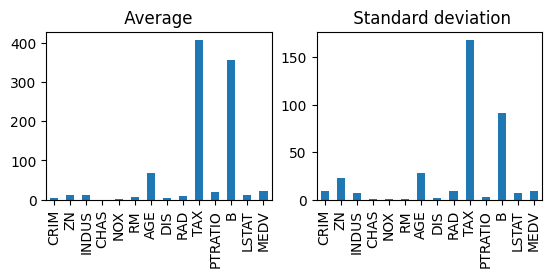

In [ ]:
#part c
mean=[]
std=[]
mean= df.mean()    # it is mean of Tv and Sales
print("The means are: ",mean)
std=df.std()      # it is standard deviation of tv and sales
print("The Standard Deviation  are: ",std)
plt.subplot(2 ,2,1)
(df.mean()).plot(kind ="bar")
plt.title(" Average ")

plt.subplot(2,2,2)
(df.std()).plot(kind="bar")
plt.title(" Standard deviation")
plt.show()



In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd


# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

# Z-score (Standardization)
#scaler_standard = StandardScaler()
#df_standard = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)


print("\nMin-Max Scaled Data:")
print(df)



Min-Max Scaled Data:
         CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455   0.0  0.386831  0.619467  0.889804  0.114514   
505  0.000462  0.00  0.420455   0.0  0.386831  0.473079  0.675783  0.125072   

          RAD       TAX   PTR

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(columns=['CRIM'])  # Features
Y = df['CRIM']  # Labels

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
x_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [ ]:
x_train=X_train.values
y_train=Y_train.values.reshape(-1,1)
print(x_train.shape,y_train.shape)

(404, 13) (404, 1)


In [ ]:

y_test=Y_test.values.reshape(-1,1)
y_test.shape

(102, 1)

In [ ]:
x_train = np.vstack((np.ones((x_train.shape[0], )), x_train.T)).T


In [ ]:
X_test = np.vstack((np.ones((x_test.shape[0], )), x_test.T)).T   # here i have add column of ones at zero index .

In [ ]:
print("Shape of X_train :", x_train.shape)
print("Shape of Y_train :", y_train.shape)
print("Shape of X_test :", x_test.shape)
print("Shape of Y_test :", y_test.shape)

Shape of X_train : (404, 14)
Shape of Y_train : (404, 1)
Shape of X_test : (102, 14)
Shape of Y_test : (102, 1)


In [ ]:
x_train[:,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
def model_Multi_regression(X, Y, learning_rate, iteration):
      m = Y.size
      theta = np.zeros((X.shape[1], 1))
      cost_list = []
      for i in range(iteration):
           y_pred = np.dot(X, theta)
           cost = (1/(2*m))*np.sum(np.square(y_pred - Y))  # this is the cost function
           d_theta = (1/m)*np.dot(X.T, y_pred - Y)    # this is gradient descent function
           theta = theta - learning_rate*d_theta
           cost_list.append(cost)
# to print the cost for 10 times
      if(i%(iteration/10) == 0):
           print("Cost is :", cost)
      return theta, cost_list

In [ ]:
iteration = 10000
learning_rate = 0.000000005
theta, cost_list = model_Multi_regression(x_test, y_test, learning_rate = learning_rate, iteration =
iteration)
print(theta,cost_list)

[[2.04761840e-06]
 [1.51058089e-08]
 [1.29534660e-06]
 [1.51161402e-08]
 [1.19175760e-06]
 [8.51091154e-07]
 [1.92564689e-06]
 [1.46508708e-07]
 [1.95726964e-06]
 [1.80296076e-06]
 [1.63743365e-06]
 [1.35285751e-06]
 [1.20404680e-06]
 [4.09144989e-07]] [0.00431201591488979, 0.004312015864969771, 0.004312015815049756, 0.004312015765129741, 0.00431201571520973, 0.004312015665289719, 0.00431201561536971, 0.004312015565449703, 0.004312015515529698, 0.004312015465609694, 0.004312015415689693, 0.004312015365769695, 0.004312015315849698, 0.004312015265929701, 0.004312015216009706, 0.004312015166089714, 0.004312015116169724, 0.0043120150662497355, 0.004312015016329749, 0.004312014966409764, 0.004312014916489781, 0.004312014866569799, 0.00431201481664982, 0.004312014766729843, 0.004312014716809867, 0.004312014666889893, 0.00431201461696992, 0.004312014567049949, 0.004312014517129982, 0.004312014467210014, 0.00431201441729005, 0.004312014367370087, 0.004312014317450126, 0.004312014267530167, 0.0

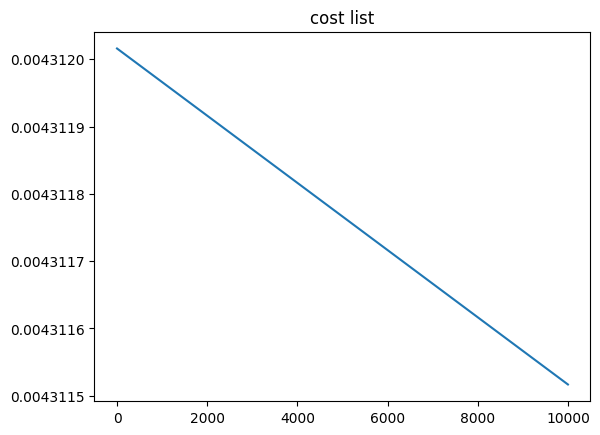

In [ ]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.title("cost list")
plt.show()

In [ ]:
y_pred = np.dot(x_test, theta)         # basically accuracy is 1 - error . I find error
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - y_test))
print(error)

0.04094787321183173


In [ ]:
accuracy= (1-error)*100
print(accuracy)      # this is my

95.90521267881684


<Axes: >

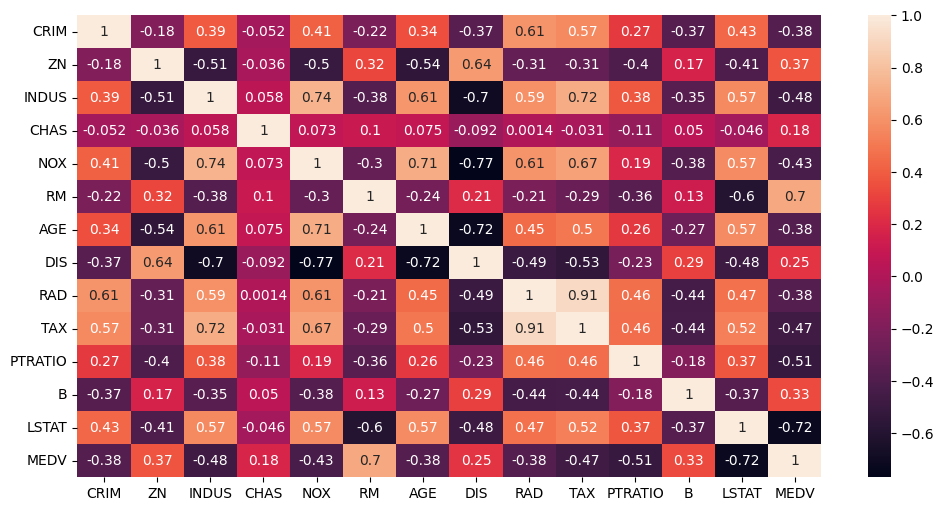

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
corr_val=df.corr()
sns.heatmap(data=corr_val,annot=True)      #corelation matrix

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Get predictions for the test se

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.008623033611531177
Mean Absolute Error (MAE): 0.04094787321183173
